In [907]:
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
from datetime import datetime as dt 
from matplotlib.font_manager import FontProperties
import seaborn as sns 
import numpy as np
%matplotlib inline 

In [908]:
df=pd.read_csv('/Users/dasha/Downloads/Crime_Data_from_2010_to_Present.csv',parse_dates=['Date Occurred','Time Occurred'])

In [909]:
pd.options.display.max_columns=None 

In [910]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777943 entries, 0 to 1777942
Data columns (total 26 columns):
DR Number                 int64
Date Reported             object
Date Occurred             datetime64[ns]
Time Occurred             object
Area ID                   int64
Area Name                 object
Reporting District        int64
Crime Code                int64
Crime Code Description    object
MO Codes                  object
Victim Age                float64
Victim Sex                object
Victim Descent            object
Premise Code              float64
Premise Description       object
Weapon Used Code          float64
Weapon Description        object
Status Code               object
Status Description        object
Crime Code 1              float64
Crime Code 2              float64
Crime Code 3              float64
Crime Code 4              float64
Address                   object
Cross Street              object
Location                  object
dtypes: datetime64

In [911]:
df=df.drop(columns=['DR Number','Date Reported','Reporting District','MO Codes','Crime Code','Area ID','Premise Code','Weapon Used Code','Status Code','Crime Code 1','Crime Code 2','Crime Code 3','Crime Code 4','Address','Cross Street'])
df

,Date Occurred,Time Occurred,Area Name,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Weapon Description,Status Description,Location
0,2013-03-11,1800,77th Street,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,"(33.9829, -118.3338)"
1,2010-01-22,2300,Olympic,VEHICLE - STOLEN,NaN,NaN,NaN,STREET,NaN,Invest Cont,"(34.0454, -118.3157)"
2,2013-03-18,2030,Southeast,VEHICLE - STOLEN,12.0,NaN,NaN,STREET,NaN,Invest Cont,"(33.942, -118.2717)"
3,2010-11-10,1800,Southeast,VEHICLE - STOLEN,NaN,NaN,NaN,STREET,NaN,Invest Cont,"(33.9572, -118.2717)"
4,2014-01-04,2300,Topanga,VANDALISM - MISDEAMEANOR ($399 OR UNDER),84.0,M,W,SINGLE FAMILY DWELLING,NaN,Invest Cont,"(34.2009, -118.6369)"
5,2013-01-08,1400,Central,CRIMINAL HOMICIDE,49.0,F,W,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,"(34.0591, -118.2412)"
6,2010-01-27,2230,Northeast,VEHICLE - STOLEN,NaN,NaN,NaN,PARKING LOT,NaN,Invest Cont,"(34.1211, -118.2048)"
7,2010-11-07,1600,Foothill,VEHICLE - STOLEN,NaN,NaN,NaN,STREET,NaN,Invest Cont,"(34.241, -118.3987)"
8,2010-04-07,1600,Mission,VEHICLE - STOLEN,NaN,NaN,NaN,STREET,NaN,Invest Cont,"(34.3147, -118.4589)"
9,2013-01-15,0800,Van Nuys,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",27.0,F,O,OTHER BUSINESS,NaN,Invest Cont,"(34.2012, -118.4662)"


In [912]:
df['Time Occurred']=df['Time Occurred'].astype('str')


In [913]:
def time_categorizer(time_str):
    if (time_str>'06:00:00') & (time_str<='12:00:00'):
        return "Morning"
    elif (time_str>'12:00:00') & (time_str<='17:00:00'):
        return 'Afternoon'
    elif (time_str>'17:00:00') & (time_str<='22:00:00'):
        return 'Evening'
    else: 
        return 'Night'

df['Time']=df['Time Occurred'].apply(time_categorizer)

In [914]:
df.drop(columns='Time Occurred',inplace=True)

In [915]:
num_row=df.shape[0]
print(num_row)
vic_age=df['Victim Age'].isna().sum()
vic_sex=df['Victim Sex'].isna().sum()
vic_des=df['Victim Descent'].isna().sum()
vic_total=df[['Victim Age','Victim Sex','Victim Descent']].isna().sum()

1777943


In [916]:
print('Victim Age Null = ',num_row/vic_age)
print('Victim Sex Null = ',num_row/vic_sex)
print('Victim Descent Null = ',num_row/vic_des)
#NaN values in Victim Age are 1/12th of the total data 
#NaN values in Victim Sex are 1/10th of the total data 
#NaN values in Victim Descent are 1/10th of the total data 
#NaN of 3 groups comprise approx. 1/6 of total data - will keep the NaN values since 
#some of that data will be useful for other calculations 

Victim Age Null =  12.520019998873304
Victim Sex Null =  10.84945140778891
Victim Descent Null =  10.846803811754945


In [917]:
df['Victim Age'].fillna('Missing',inplace=True)
df['Victim Sex'].fillna('Missing',inplace=True)
df['Victim Descent'].fillna('Missing',inplace=True)

In [918]:
df['Weapon Description'].value_counts()

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    359452
VERBAL THREAT                                      49191
UNKNOWN WEAPON/OTHER WEAPON                        46718
HAND GUN                                           28339
SEMI-AUTOMATIC PISTOL                              11161
KNIFE WITH BLADE 6INCHES OR LESS                   10606
OTHER KNIFE                                         7823
UNKNOWN FIREARM                                     6637
VEHICLE                                             6049
REVOLVER                                            4993
BOTTLE                                              4242
ROCK/THROWN OBJECT                                  3696
STICK                                               3684
BLUNT INSTRUMENT                                    3683
CLUB/BAT                                            3583
FOLDING KNIFE                                       3516
KITCHEN KNIFE                                       3164
SIMULATED GUN                  

In [919]:
(df['Weapon Description'].isna().sum())/num_row*100

66.75281491026428

In [920]:
df.drop(columns='Weapon Description',inplace=True)

In [921]:
#More than 50% of weapon Description data is missing therefore NaN values wont be dropped
# will keep this column for now 

In [922]:
df['Premise Description'].unique()

array(['MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'STREET',
       'SINGLE FAMILY DWELLING', 'PARKING LOT', 'OTHER BUSINESS',
       'DEPARTMENT STORE', 'SIDEWALK', 'OTHER STORE',
       'NIGHT CLUB (OPEN EVENINGS ONLY)', 'HOSPITAL', 'POST OFFICE',
       'VEHICLE, PASSENGER/TRUCK', 'MARKET', 'JEWELRY STORE',
       'RESTAURANT/FAST FOOD', 'OTHER PREMISE', 'THEATRE/MOVIE',
       'OTHER RESIDENCE', 'PROJECT/TENEMENT/PUBLIC HOUSING',
       'BAR/COCKTAIL/NIGHTCLUB', 'MEDICAL/DENTAL OFFICES', 'VACANT LOT',
       'DRIVEWAY', 'POLICE FACILITY', 'FREEWAY', 'HOTEL',
       'CLOTHING STORE', 'DRUG STORE', 'PARK/PLAYGROUND',
       'CELL PHONE STORE', 'HEALTH SPA/GYM', 'OTHER/OUTSIDE',
       'HARDWARE/BUILDING SUPPLY', 'ALLEY', 'TOBACCO SHOP', 'BUS STOP',
       'SWAP MEET', 'MINI-MART', 'STORAGE SHED', 'GARAGE/CARPORT',
       'HIGH SCHOOL', 'PUBLIC STORAGE', 'PARKING UNDERGROUND/BUILDING',
       'OFFICE BUILDING/OFFICE', 'WAREHOUSE', 'SKATING RINK*',
       'CONVENTION CENTER', 'BANK

In [923]:
(df['Premise Description'].isna().sum())/num_row*100

0.1827392666694039

In [924]:
# Premise Description data is well populated and could be used in calculations 
# Will drop NaN values since number of missing data is insignificant 

In [925]:
df.dropna(subset=['Premise Description'],how='any',inplace=True)

In [926]:
Crime={
'Motor Vehicle and Transportation-Related Crime':['RECKLESS DRIVING',
                                                  'DRIVING WITHOUT OWNER CONSENT (DWOC)',
                                                  'FAILURE TO YIELD','TRAIN WRECKING'],
'Sexually-Motivated Crime':['INTIMATE PARTNER - SIMPLE ASSAULT',
                            'INTIMATE PARTNER - AGGRAVATED ASSAULT',
                            'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH 0007=02',
                            'INDECENT EXPOSURE','RAPE, FORCIBLE',
                            'SEXUAL PENTRATION WITH A FOREIGN OBJECT',
                            'LETTERS, LEWD',
                            'RAPE, ATTEMPTED',
                            'LEWD CONDUCT',
                            'PIMPING',
                            'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM0065',
                            'PEEPING TOM',
                            'SEX, UNLAWFUL',
                            'ORAL COPULATION',
                            'PANDERING',
                            'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)',
                            'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ0059',
                            'SEXUAL PENETRATION W/FOREIGN OBJECT',
                            'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
                            'LEWD/LASCIVIOUS ACTS WITH CHILD','SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
                            'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD','SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH'],
       'Human Trafficking':['HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
                            'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE'],
       'Vandalism and Property Damage':['VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
                                        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
                                        'TELEPHONE PROPERTY - DAMAGE',
                                        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114'],
       'Kidnapping':['KIDNAPPING',
                     'CHILD STEALING',
                     'KIDNAPPING - GRAND ATTEMPT'],
       'Criminal Threats':['CRIMINAL THREATS - NO WEAPON DISPLAYED',
                           'STALKING','BOMB SCARE','BRANDISH WEAPON',
                           'THREATENING PHONE CALLS/LETTERS'],
       'Homoside':['CRIMINAL HOMICIDE',
                   'LYNCHING - ATTEMPTED',
                   'LYNCHING',
                   'MANSLAUGHTER, NEGLIGENT'],
       'Robbery and Theft':['EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
                            'THEFT PLAIN - PETTY ($950 & UNDER)','SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
                            'BIKE - STOLEN',
                            'ROBBERY',
                            'ATTEMPTED ROBBERY',
                            'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036',
                            'BURGLARY FROM VEHICLE', 'BATTERY WITH SEXUAL CONTACT',
                            'BURGLARY','SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
                            'THEFT, PERSON','EXTORTION','BURGLARY FROM VEHICLE, ATTEMPTED',
                            'FALSE IMPRISONMENT',
                            'THEFT PLAIN - ATTEMPT',
                            'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
                            'BURGLARY, ATTEMPTED',
                            'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)',
                            'THEFT OF IDENTITY',
                            'BUNCO, GRAND THEFT',
                            'PURSE SNATCHING',
                            'PROWLER',
                            'VEHICLE - ATTEMPT STOLEN',
                            'BIKE - ATTEMPTED STOLEN',
                            'THEFT FROM PERSON - ATTEMPT',
                            'PICKPOCKET',
                            'VEHICLE - STOLEN','DISHONEST EMPLOYEE - PETTY THEFT',
                            'BUNCO, ATTEMPT',
                            'BUNCO, PETTY THEFT',
                            'SHOPLIFTING - ATTEMPT',
                            'PICKPOCKET, ATTEMPT',
                            'PURSE SNATCHING - ATTEMPT',
                            'THEFT FROM MOTOR VEHICLE - ATTEMPT',
                            'DISHONEST EMPLOYEE - GRAND THEFT',
                            'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
                            'BOAT - STOLEN','TILL TAP - PETTY ($950 & UNDER)',
                            'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
                            'GRAND THEFT / AUTO REPAIR',
                            'PETTY THEFT - AUTO REPAIR',
                            'TILL TAP - ATTEMPT',
                            'TILL TAP - GRAND THEFT ($950.01 & OVER)',
                            'DRUNK ROLL - ATTEMPT','THEFT, COIN MACHINE - ATTEMPT',
                            'DISHONEST EMPLOYEE ATTEMPTED THEFT','DRUNK ROLL','EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)'],
    'Fraud and Bribery':['COUNTERFEIT','DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER',
                         'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
                         'CREDIT CARDS, FRAUD USE ($950 & UNDER',
                         'DOCUMENT WORTHLESS ($200.01 & OVER)',
                         'BRIBERY',
                         'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400',
                         'GRAND THEFT / INSURANCE FRAUD','DOCUMENT WORTHLESS ($200 & UNDER)',
                         'DOCUMENT FORGERY / STOLEN FELONY'],
    'Assault':['BATTERY - SIMPLE ASSAULT',
               'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
               'OTHER ASSAULT',
               'INTIMATE PARTNER - AGGRAVATED ASSAULT',
               'SHOTS FIRED AT INHABITED DWELLING',
               'BATTERY POLICE (SIMPLE)',
               'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
               'BATTERY ON A FIREFIGHTER','SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT','THROWING OBJECT AT MOVING VEHICLE','DISCHARGE FIREARMS/SHOTS FIRED'],
    'Violation of Orders or Resisting Arrest':['RESISTING ARREST',
                                               'VIOLATION OF COURT ORDER',
                                               'VIOLATION OF RESTRAINING ORDER',
                                               'VIOLATION OF TEMPORARY RESTRAINING ORDER',
                                               'FIREARMS RESTRAINING ORDER (FIREARMS RO)',
                                               'CONTEMPT OF COURT'],
    'Other':['OTHER MISCELLANEOUS CRIME','DISTURBING THE PEACE','CRUELTY TO ANIMALS',
            'UNAUTHORIZED COMPUTER ACCESS',
             'ILLEGAL DUMPING','FALSE POLICE REPORT',
             'CONTRIBUTING','DISRUPT SCHOOL','BIGAMY',
             'BLOCKING DOOR INDUCTION CENTER','TRESPASSING','nan'], 
    'Weapon possession/Bombing':['WEAPONS POSSESSION/BOMBING'],
    'Riot-Related Crime and Conspiracy':['INCITING A RIOT', 
                                         'FAILURE TO DISPERSE',
                                         'CONSPIRACY'],
    'Child-Related Crime':['CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
                           'CHILD NEGLECT (SEE 300 W.I.C.)',
                           'CHILD ANNOYING (17YRS & UNDER)',
                           'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)0060',
                           'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
                           'CHILD ABANDONMENT','CHILD PORNOGRAPHY',
                           'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)'],
    'Abortion':['ABORTION/ILLEGAL'],
    'Unlawful Sales':['DRUGS, TO A MINOR','REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)0132',
                      'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)'],
'Arson':['ARSON']}

In [927]:
reverse_crime={val: key for key in Crime for val in Crime[key]}

In [928]:
df['Crime Code Description']=df['Crime Code Description'].astype('str')

In [929]:
df['Crime']=df['Crime Code Description'].map(reverse_crime)

In [930]:
df['Premise Description']=df['Premise Description'].replace({'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)':'MULTI-UNIT DWELLING'})

In [931]:
df['Crime'].notnull().all().all()

True

In [932]:
df=df.drop(columns='Crime Code Description')
df.head(3)

,Date Occurred,Area Name,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Description,Location,Time,Crime
0,2013-03-11,77th Street,30,F,W,MULTI-UNIT DWELLING,Adult Other,"(33.9829, -118.3338)",Evening,Sexually-Motivated Crime
1,2010-01-22,Olympic,Missing,Missing,Missing,STREET,Invest Cont,"(34.0454, -118.3157)",Night,Robbery and Theft
2,2013-03-18,Southeast,12,Missing,Missing,STREET,Invest Cont,"(33.942, -118.2717)",Evening,Robbery and Theft


In [933]:
df.notnull().all().all()

True

In [934]:
timed_data=df.loc[:,['Date Occurred','Area Name','Crime']]
timed_data['Year']=timed_data['Date Occurred'].dt.year

In [935]:
#Yearly data....

In [936]:
yearly_data=timed_data.drop(columns='Date Occurred')
yearly_data=yearly_data[yearly_data['Year']!=2018]
yearly_data=yearly_data.groupby(['Year','Area Name']).count()
yearly_data.head() 

Crime
Year Area Name         
2010 77th Street  14412
     Central       7136
     Devonshire   10606
     Foothill      9309
     Harbor        9564

In [937]:
yearly_data['Crime Count']=yearly_data['Crime']
yearly_data=yearly_data.drop(columns='Crime')


In [938]:
yearly_data=yearly_data.unstack(level='Area Name')
yearly_data


Crime Count                                                          \
Area Name 77th Street Central Devonshire Foothill Harbor Hollenbeck Hollywood   
Year                                                                            
2010            14412    7136      10606     9309   9564       7379      9187   
2011            14226    7161       9613     8481   9818       6521      9231   
2012            14261    8071       9400     7902   9403       7055      9296   
2013            13701    7575       8639     7450   8391       6687      8519   
2014            14006    8288       8598     7098   8265       6884      8532   
2015            14578   10015       9974     7645   9466       7975      9745   
2016            15306   10549      10269     7862   9480       9119     10508   
2017            15390   11585      10564     8114   9625       8978     11213   

                                                                        \
Area Name Mission N Hollywood Newton Northeast Olympic Pacific Rampart   
Year                                                                     
2010        10527       11333   9970     10603    8727   11078    8682   
2011        10508       10674   9328      9814    7968   10361    8409   
2012        10535       11237   8870      9829    8499   10297    8580   
2013        10240       10904   8602      9252    8262   10087    8118   
2014         9882       10351   9184      9654    9122   10726    8514   
2015        10568       11732   9595     10230    9787   11687    9215   
2016        10951       11934  10970     10326   10481   11734    9118   
2017        10749       12241  11656     10444   11119   12095    9553   

                                                                             
Area Name Southeast Southwest Topanga Van Nuys West LA West Valley Wilshire  
Year                                                                         
2010          11051     13622    9889    10056    8156        9226     8163  
2011          11031     12899    9092     9502    8590        8812     8262  
2012          10557     13081    8899     9615    8573        8982     8027  
2013          10159     12678    9057     9343    8148        8362     7809  
2014          10514     12932    8734     9407    8162        7881     7881  
2015          11053     13799    9824    10423    9656        8627     8276  
2016          11366     14097   10884    10394    9315        9560     8995  
2017          11720     14223   10685    10678    8943        9688     9425

Text(0.5,1,'LA Crime Rate by District')

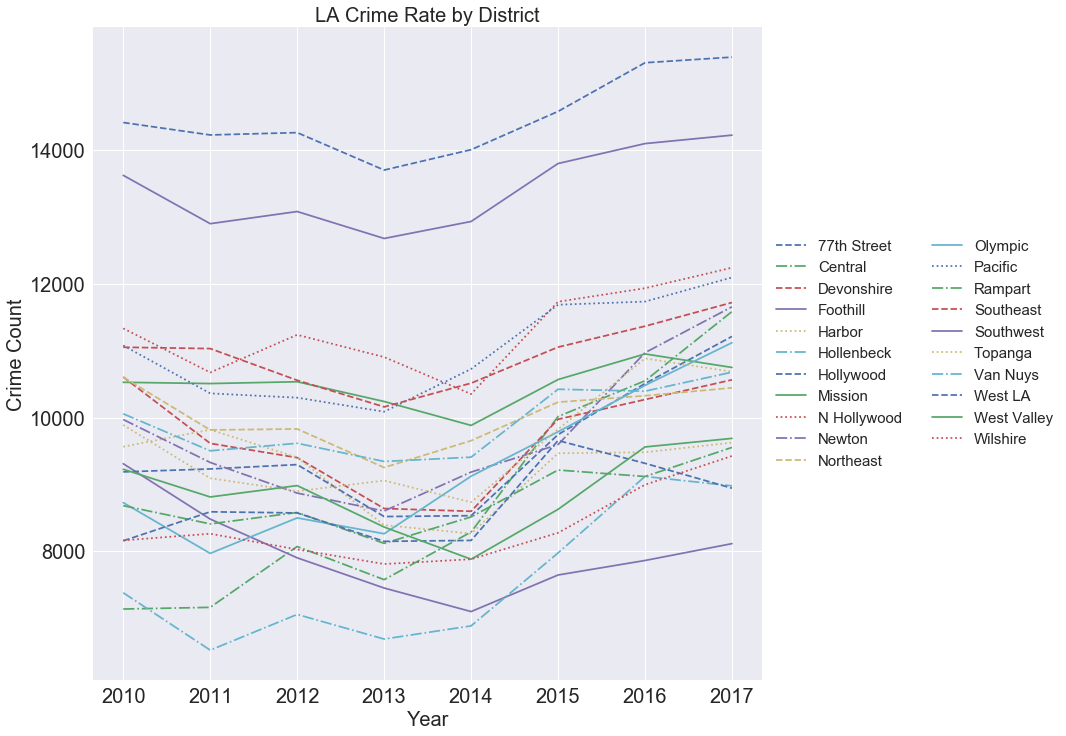

In [939]:
plot=yearly_data['Crime Count'].plot(by='Area Name',style=['--','-.','--','-',':','-.','--','-',':','-.','--','-',':','-.','--','-',':','-.','--','-',':','-.','--','-'],figsize=(12,12))
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15}, ncol=2,facecolor='inherit')
plt.ylabel('Crime Count',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('LA Crime Rate by District',fontsize=20)


In [940]:
# Seems that 77th Street and Southwest districts are the most dangerous 

In [941]:
#Hollenbeck was safest up until 2014
#Central area,Newton,Olympic crime has been rising rapidly since 2013 
#2014 seems to have the least amount of crime for areas in general 
#Foothill was able to bring down the crime significantly from 2010 to 2014 
# What happened in 2013 and 2014??? 

Text(0.5,1,'Regions With Increasing and Decreasing Crime')

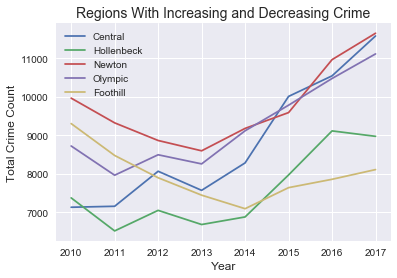

In [942]:
plot=yearly_data['Crime Count'].plot(y=['Central','Hollenbeck','Newton','Olympic','Foothill'])
plt.legend(loc='upper left')
plt.xlabel('Year',fontsize=12)
plt.ylabel("Total Crime Count",fontsize=12)
plt.title('Regions With Increasing and Decreasing Crime',fontsize=14)

In [943]:
yearly_bycrime=timed_data.drop(columns='Date Occurred')
yearly_bycrime=yearly_bycrime[yearly_bycrime['Year']!=2018]
yearly_bycrime.head(10)

,Area Name,Crime,Year
0,77th Street,Sexually-Motivated Crime,2013
1,Olympic,Robbery and Theft,2010
2,Southeast,Robbery and Theft,2013
3,Southeast,Robbery and Theft,2010
4,Topanga,Vandalism and Property Damage,2014
5,Central,Homoside,2013
6,Northeast,Robbery and Theft,2010
7,Foothill,Robbery and Theft,2010
8,Mission,Robbery and Theft,2010
9,Van Nuys,Robbery and Theft,2013


In [944]:
yearly_bycrime=yearly_bycrime.groupby(['Year','Area Name','Crime']).size().to_frame(name='Count')

In [945]:
yearly_bycrime

Count
Year Area Name   Crime                                                
2010 77th Street Arson                                              28
                 Assault                                          3151
                 Child-Related Crime                               395
                 Criminal Threats                                  698
                 Fraud and Bribery                                 106
                 Homoside                                           39
                 Kidnapping                                         62
                 Motor Vehicle and Transportation-Related Crime      2
                 Other                                             328
                 Riot-Related Crime and Conspiracy                   1
                 Robbery and Theft                                6944
                 Sexually-Motivated Crime                         1032
                 Vandalism and Property Damage                    1282
                 Violation of Orders or Resisting Arrest           344
     Central     Arson                                              12
                 Assault                                          1653
                 Child-Related Crime                                40
                 Criminal Threats                                  351
                 Fraud and Bribery                                 118
                 Homoside                                            7
                 Kidnapping                                         11
                 Other                                             426
                 Robbery and Theft                                3495
                 Sexually-Motivated Crime                          415
                 Vandalism and Property Damage                     537
                 Violation of Orders or Resisting Arrest            69
                 Weapon possession/Bombing                           2
     Devonshire  Arson                                              11
                 Assault                                           950
                 Child-Related Crime                               141
...                                                                ...
2017 West Valley Arson                                              11
                 Assault                                          1076
                 Child-Related Crime                                77
                 Criminal Threats                                  349
                 Fraud and Bribery                                 162
                 Homoside                                           10
                 Kidnapping                                         20
                 Motor Vehicle and Transportation-Related Crime      6
                 Other                                             272
                 Riot-Related Crime and Conspiracy                   3
                 Robbery and Theft                                5892
                 Sexually-Motivated Crime                          703
                 Vandalism and Property Damage                     806
                 Violation of Orders or Resisting Arrest           300
                 Weapon possession/Bombing                           1
     Wilshire    Arson                                               7
                 Assault                                          1130
                 Child-Related Crime                                74
                 Criminal Threats                                  323
                 Fraud and Bribery                                 143
                 Homoside                                            7
                 Human Trafficking                                   1
                 Kidnapping                                         11
                 Motor Vehicle and Transportation-Related Crime      3
                 O

In [946]:
central_mostcommon=yearly_bycrime.loc[(slice(None),'Central'),:]
central_mostcommon=central_mostcommon.reset_index()
central_mostcommon=central_mostcommon.loc[:,['Year','Crime','Count']]
central_mostcommon.set_index(['Year','Crime'],inplace=True)
central_mostcommon=central_mostcommon.unstack(level='Crime',fill_value=0)

In [947]:
hollenbeck_mostcommon=yearly_bycrime.loc[(slice(None),'Hollenbeck'),:]
hollenbeck_mostcommon=hollenbeck_mostcommon.reset_index()
hollenbeck_mostcommon=hollenbeck_mostcommon.loc[:,['Year','Crime','Count']]
hollenbeck_mostcommon.set_index(['Year','Crime'],inplace=True)
hollenbeck_mostcommon=hollenbeck_mostcommon.unstack(level='Crime',fill_value=0)
hollenbeck_mostcommon

Count                                                                 \
Crime Arson Assault Child-Related Crime Criminal Threats Fraud and Bribery   
Year                                                                         
2010     29    1343                 195              341                59   
2011     15    1257                 213              298                75   
2012     17    1237                 202              274                55   
2013     15    1213                 185              298                99   
2014     21    1165                 133              282                76   
2015     18    1459                 139              262                64   
2016     12    1757                 153              363                67   
2017     14    1716                 144              355                62   

                                             \
Crime Homoside Human Trafficking Kidnapping   
Year                                          
2010        21                 0         19   
2011        20                 0         17   
2012        21                 0         17   
2013        18                 0         17   
2014        16                 0         16   
2015        12                 0         16   
2016        14                 0         17   
2017        17                 2         16   

                                                            \
Crime Motor Vehicle and Transportation-Related Crime Other   
Year                                                         
2010                                              13   151   
2011                                               5    87   
2012                                               4   118   
2013                                               5    68   
2014                                               2   115   
2015                                               3   109   
2016                                               5   118   
2017                                               5   154   

                                                           \
Crime Riot-Related Crime and Conspiracy Robbery and Theft   
Year                                                        
2010                                  0              3795   
2011                                  1              3193   
2012                                  0              3803   
2013                                  1              3453   
2014                                  0              3532   
2015                                  1              4037   
2016                                  0              4487   
2017                                  0              4398   

                                                              \
Crime Sexually-Motivated Crime Vandalism and Property Damage   
Year                                                           
2010                       516                           738   
2011                       470                           691   
2012                       441                           723   
2013                       427                           707   
2014                       597                           708   
2015                       764                           842   
2016                       783                          1004   
2017                       735                          1001   

                                               
Crime Violation of Orders or Resisting Arrest  
Year                                           
2010                                      159  
2011                                      179  
2012                                      143  
2013                                      181  
2014                                      221  
2015                                      249  
2016                                      339  
2017                                      359

In [948]:
newton_mostcommon=yearly_bycrime.loc[(slice(None),'Newton'),:]
newton_mostcommon=newton_mostcommon.reset_index()
newton_mostcommon=newton_mostcommon.loc[:,['Year','Crime','Count']]
newton_mostcommon.set_index(['Year','Crime'],inplace=True)
newton_mostcommon=newton_mostcommon.unstack(level='Crime',fill_value=0)

In [949]:
olympic_mostcommon=yearly_bycrime.loc[(slice(None),'Olympic'),:]
olympic_mostcommon=olympic_mostcommon.reset_index()
olympic_mostcommon=olympic_mostcommon.loc[:,['Year','Crime','Count']]
olympic_mostcommon.set_index(['Year','Crime'],inplace=True)
olympic_mostcommon=olympic_mostcommon.unstack(level='Crime',fill_value=0)

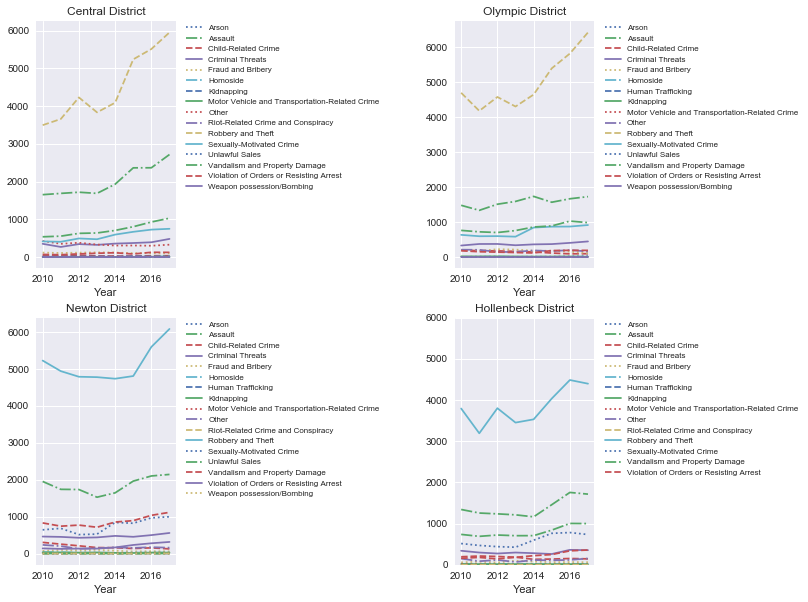

In [950]:
fig,axes=plt.subplots(nrows=2,ncols=2)
central_mostcommon['Count'].plot(ax=axes[0,0],by='Crime',figsize=(10,10),legend=True,style=[':','-.','--','-',':','-.','--','-',':','-.','--','-',':','-.','--','-',':'])
hollenbeck_mostcommon['Count'].plot(ax=axes[1,1],by='Crime',figsize=(10,10),style=[':','-.','--','-',':','-.','--','-',':','-.','--','-',':','-.','--','-',':'])
newton_mostcommon['Count'].plot(ax=axes[1,0],by='Crime',figsize=(10,10),style=[':','-.','--','-',':','-.','--','-',':','-.','--','-',':','-.','--','-',':'])
olympic_mostcommon['Count'].plot(ax=axes[0,1],by='Crime',figsize=(10,10),style=[':','-.','--','-',':','-.','--','-',':','-.','--','-',':','-.','--','-',':'])
axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':8})
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':8})
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':8})
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':8})
axes[0,0].set_title('Central District')
axes[1,1].set_title('Hollenbeck District')
axes[1,0].set_title('Newton District')
axes[0,1].set_title('Olympic District')
axes[1,1].set_ylim(0,6000)
districts=[' ','Central','Hollenbeck','Newton','Olympic']
fig.subplots_adjust(wspace=2)

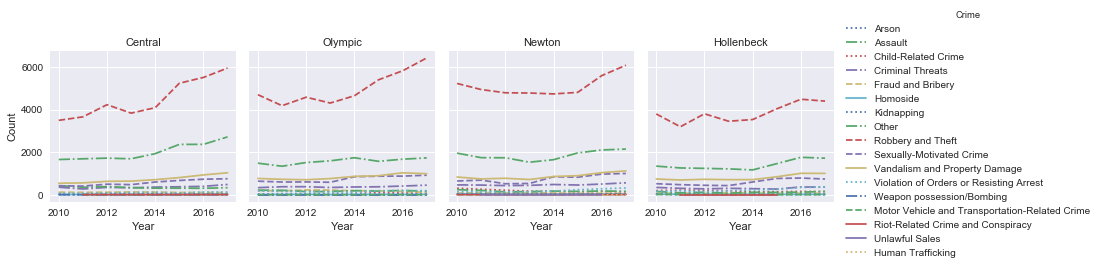

In [951]:
newdf=yearly_bycrime.reset_index()
newdf.set_index(['Area Name'],inplace=True)
newdf=newdf.loc[['Central','Olympic','Newton','Hollenbeck']]
newdf.reset_index(inplace=True)
g = sns.FacetGrid(newdf, col="Area Name", hue="Crime",palette='deep',hue_kws={'ls':[':','-.',':','-.','--','-',':','-.','--','--','-',':','-.','--','-','-',':']})
g.map(plt.plot, "Year", "Count")
g.add_legend()
g.set_titles("{col_name}")

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000.]), <a list of 10 Text yticklabel objects>)

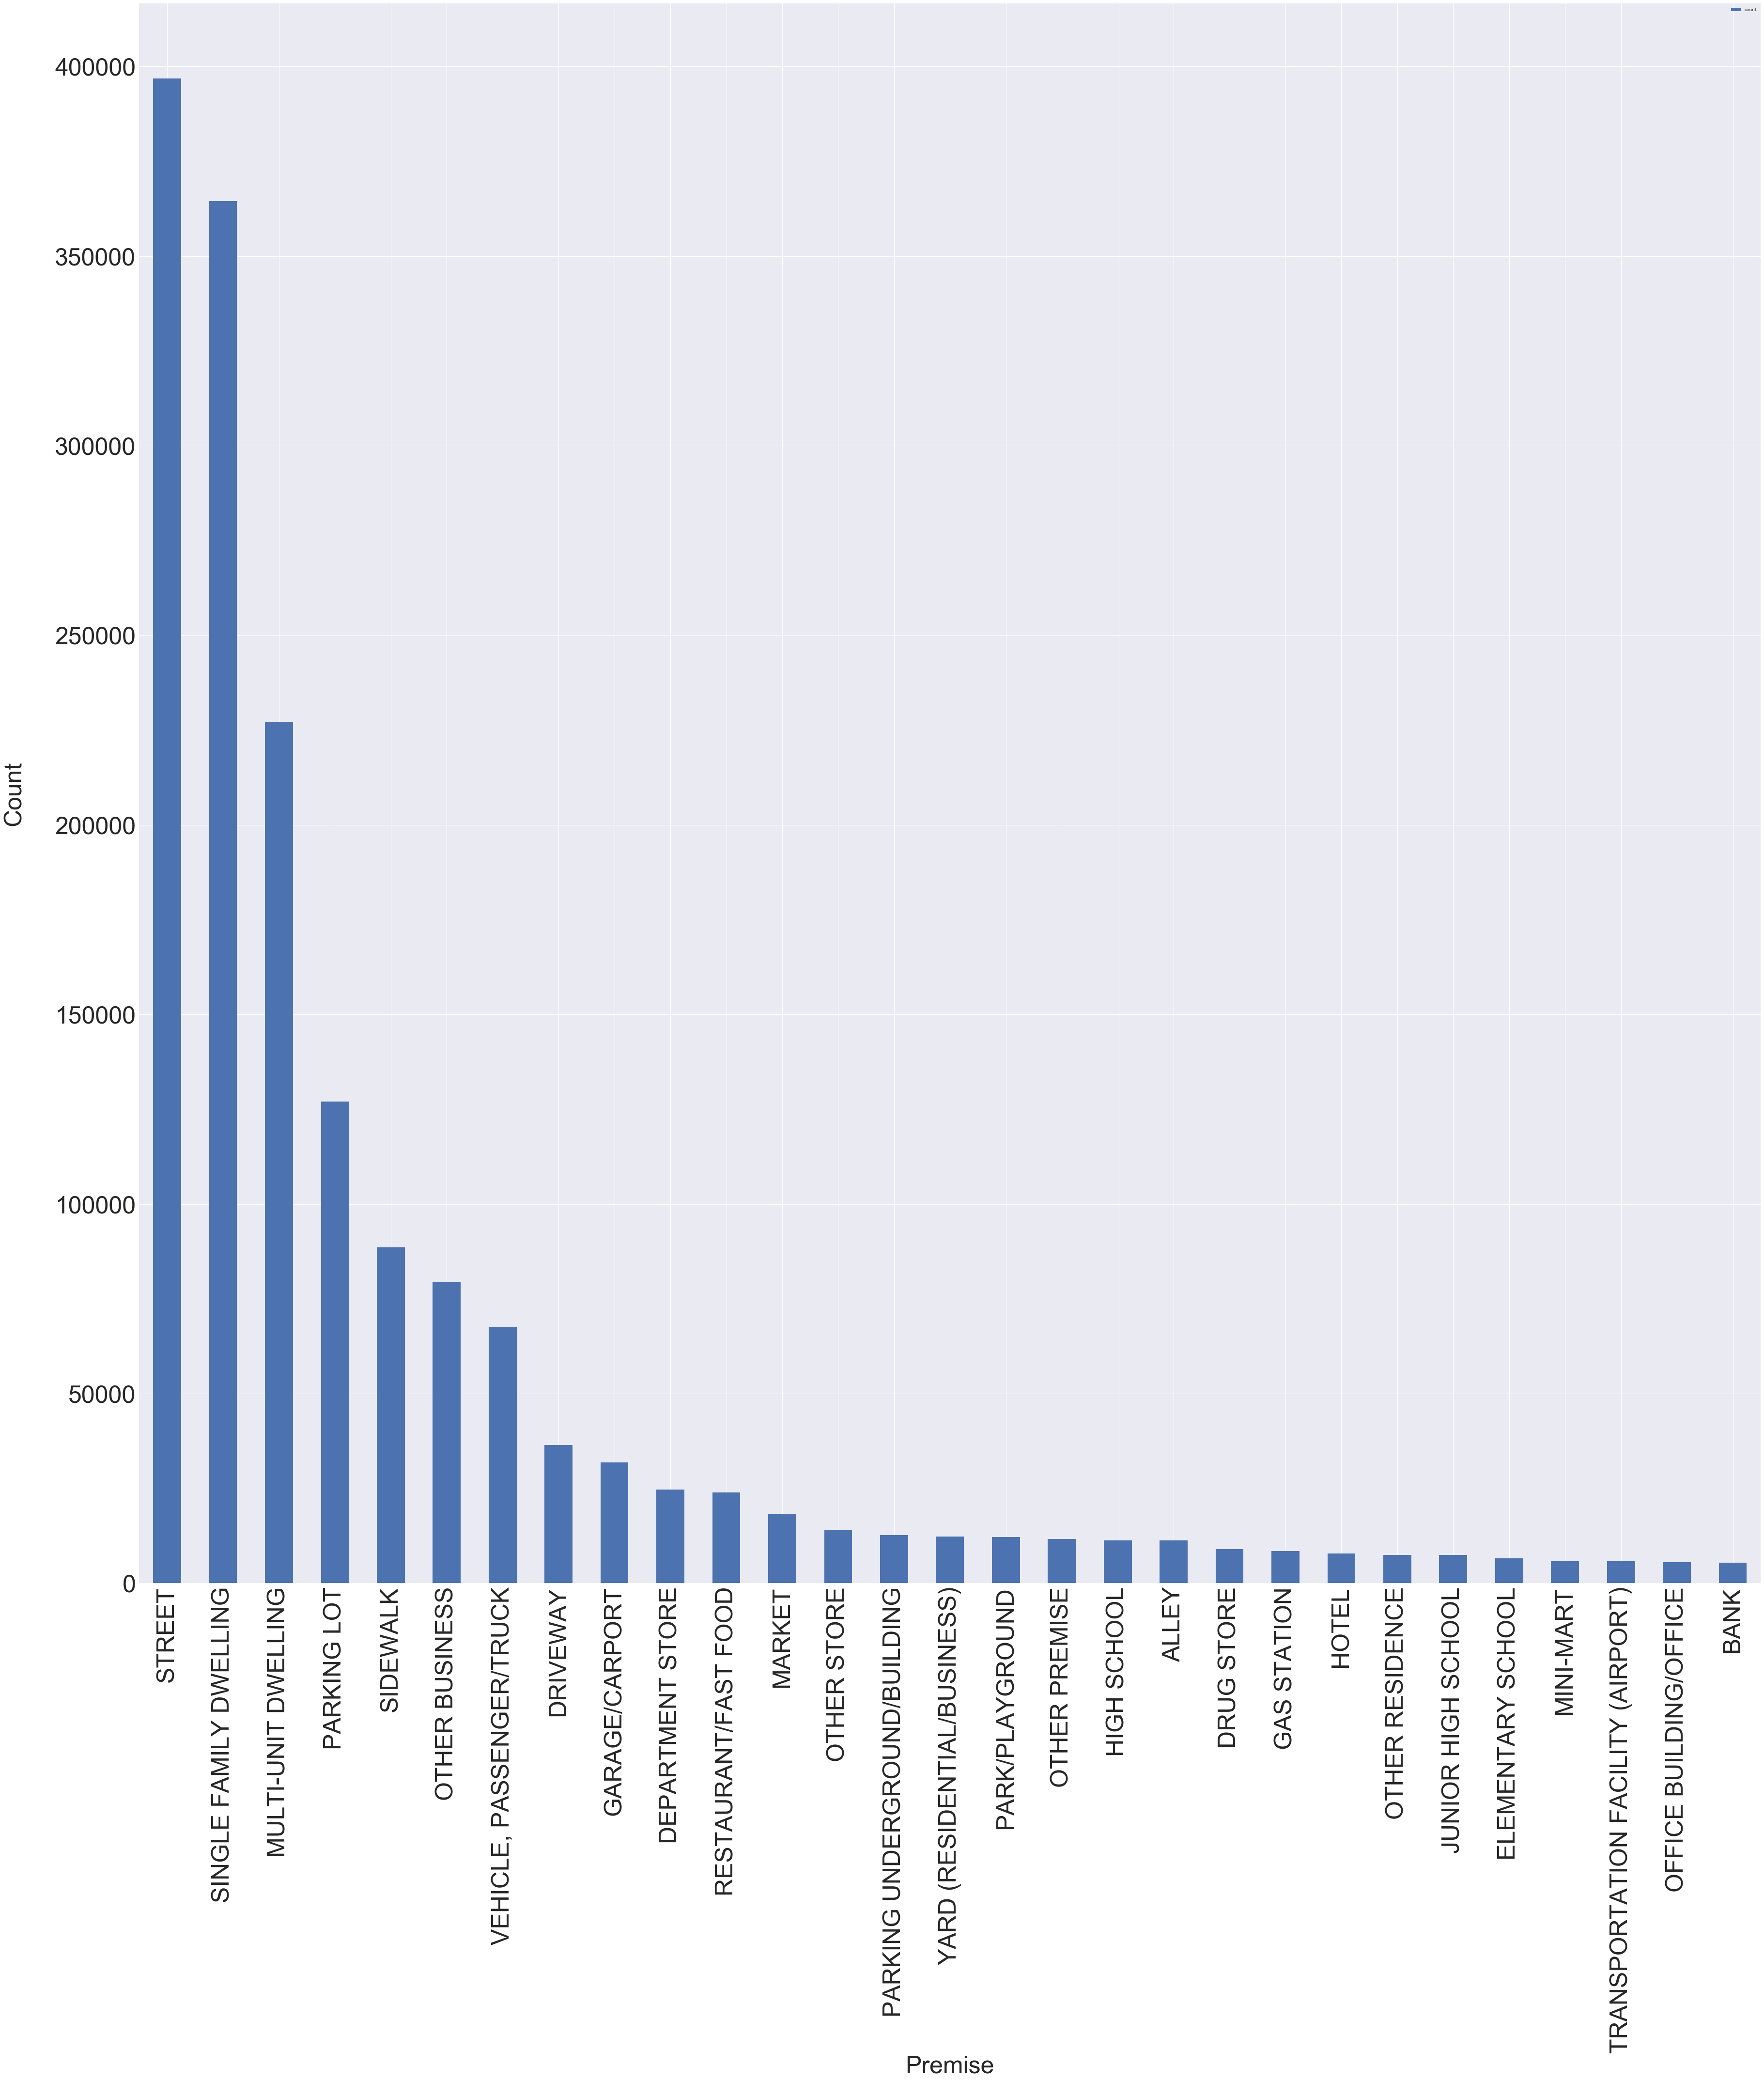

In [952]:
df_premise=df.loc[:,'Premise Description']
df_premise=df_premise.value_counts().to_frame('count')
df_premise=df_premise[df_premise['count']>5000]
df_premise.plot(kind='bar',figsize=(60,60))
plt.xlabel('Premise',fontsize=50)
plt.xticks(fontsize=50)
plt.ylabel('Count',fontsize=50,labelpad=60)
plt.yticks(fontsize=50)

(array([], dtype=float64), <a list of 0 Text yticklabel objects>)

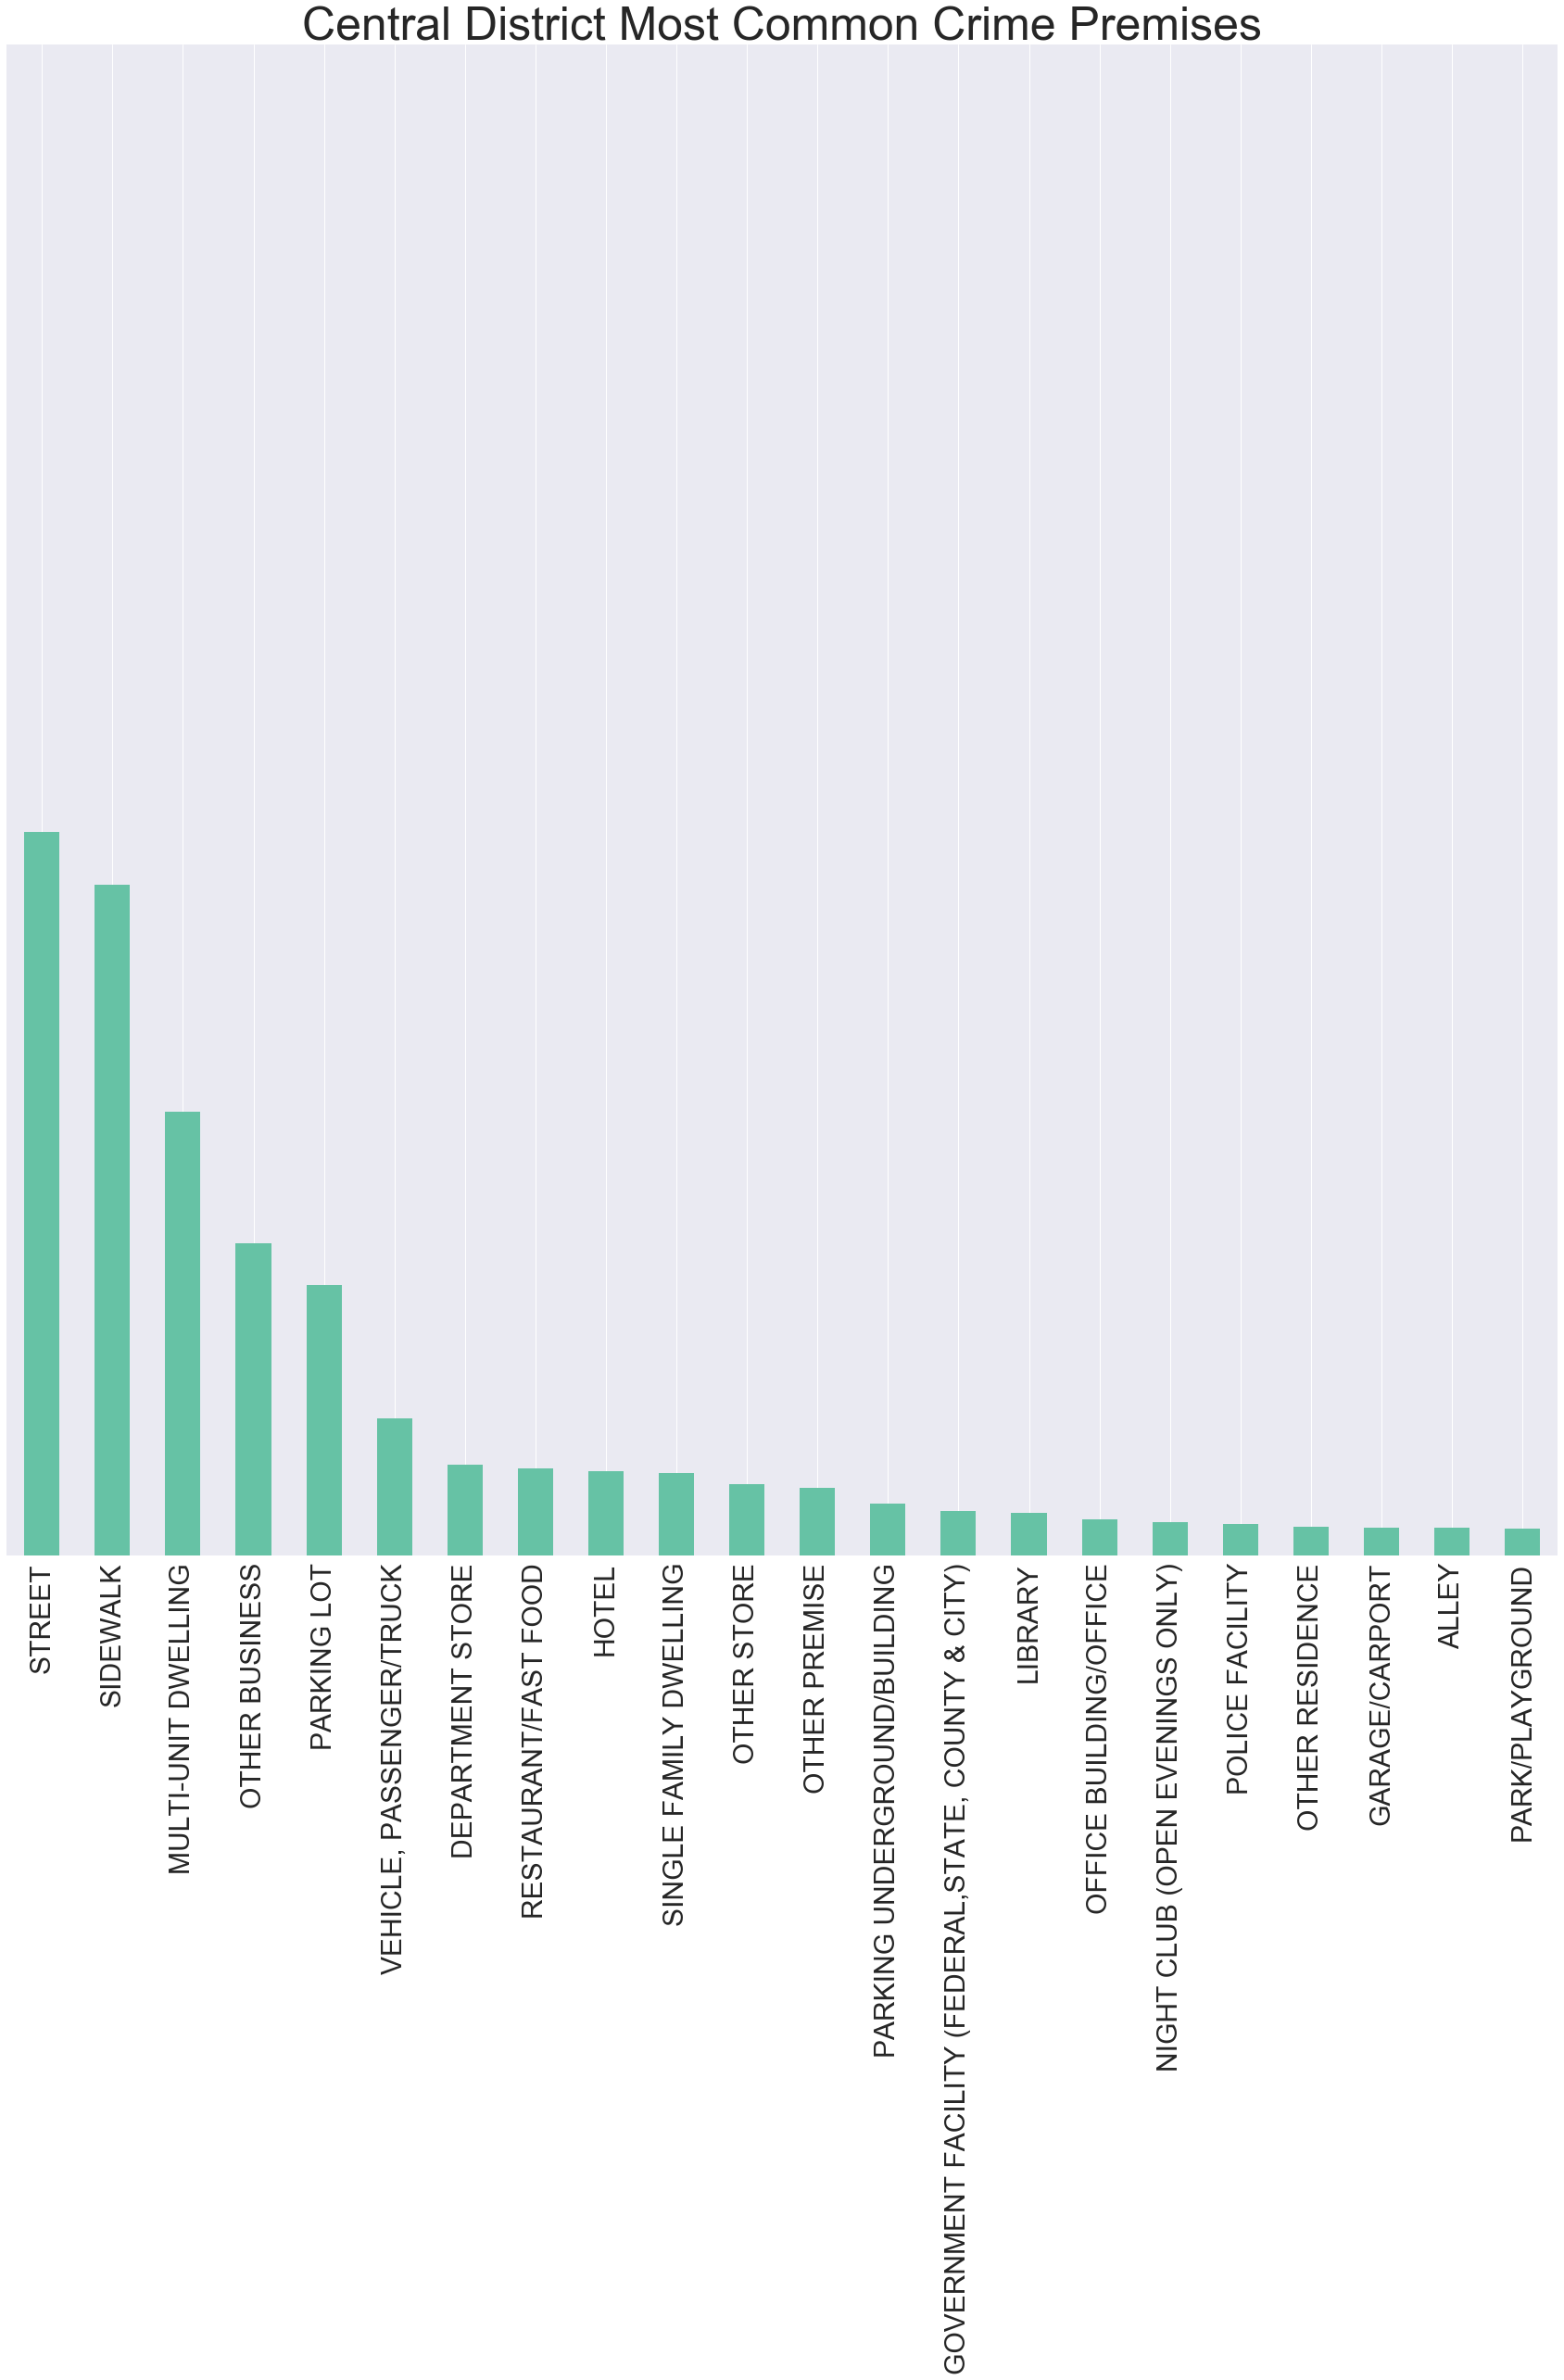

In [953]:
area_premise=df.loc[:,['Premise Description','Area Name']]
central_premise=area_premise[area_premise['Area Name']=='Central']
central_premise=central_premise.drop(columns='Area Name')
central_premise=central_premise['Premise Description'].value_counts().to_frame('Count')
central_premise=central_premise[central_premise['Count']>500]
central_premise['Count'].plot(kind='bar',figsize=(30,30),colormap='Set2')
plt.title('Central District Most Common Crime Premises',fontsize=50)
plt.xticks(fontsize=30)
plt.yticks([])
plt.ylim(0,30000)
plt.yticks(fontsize=30)
plt.yticks(fontsize=30)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

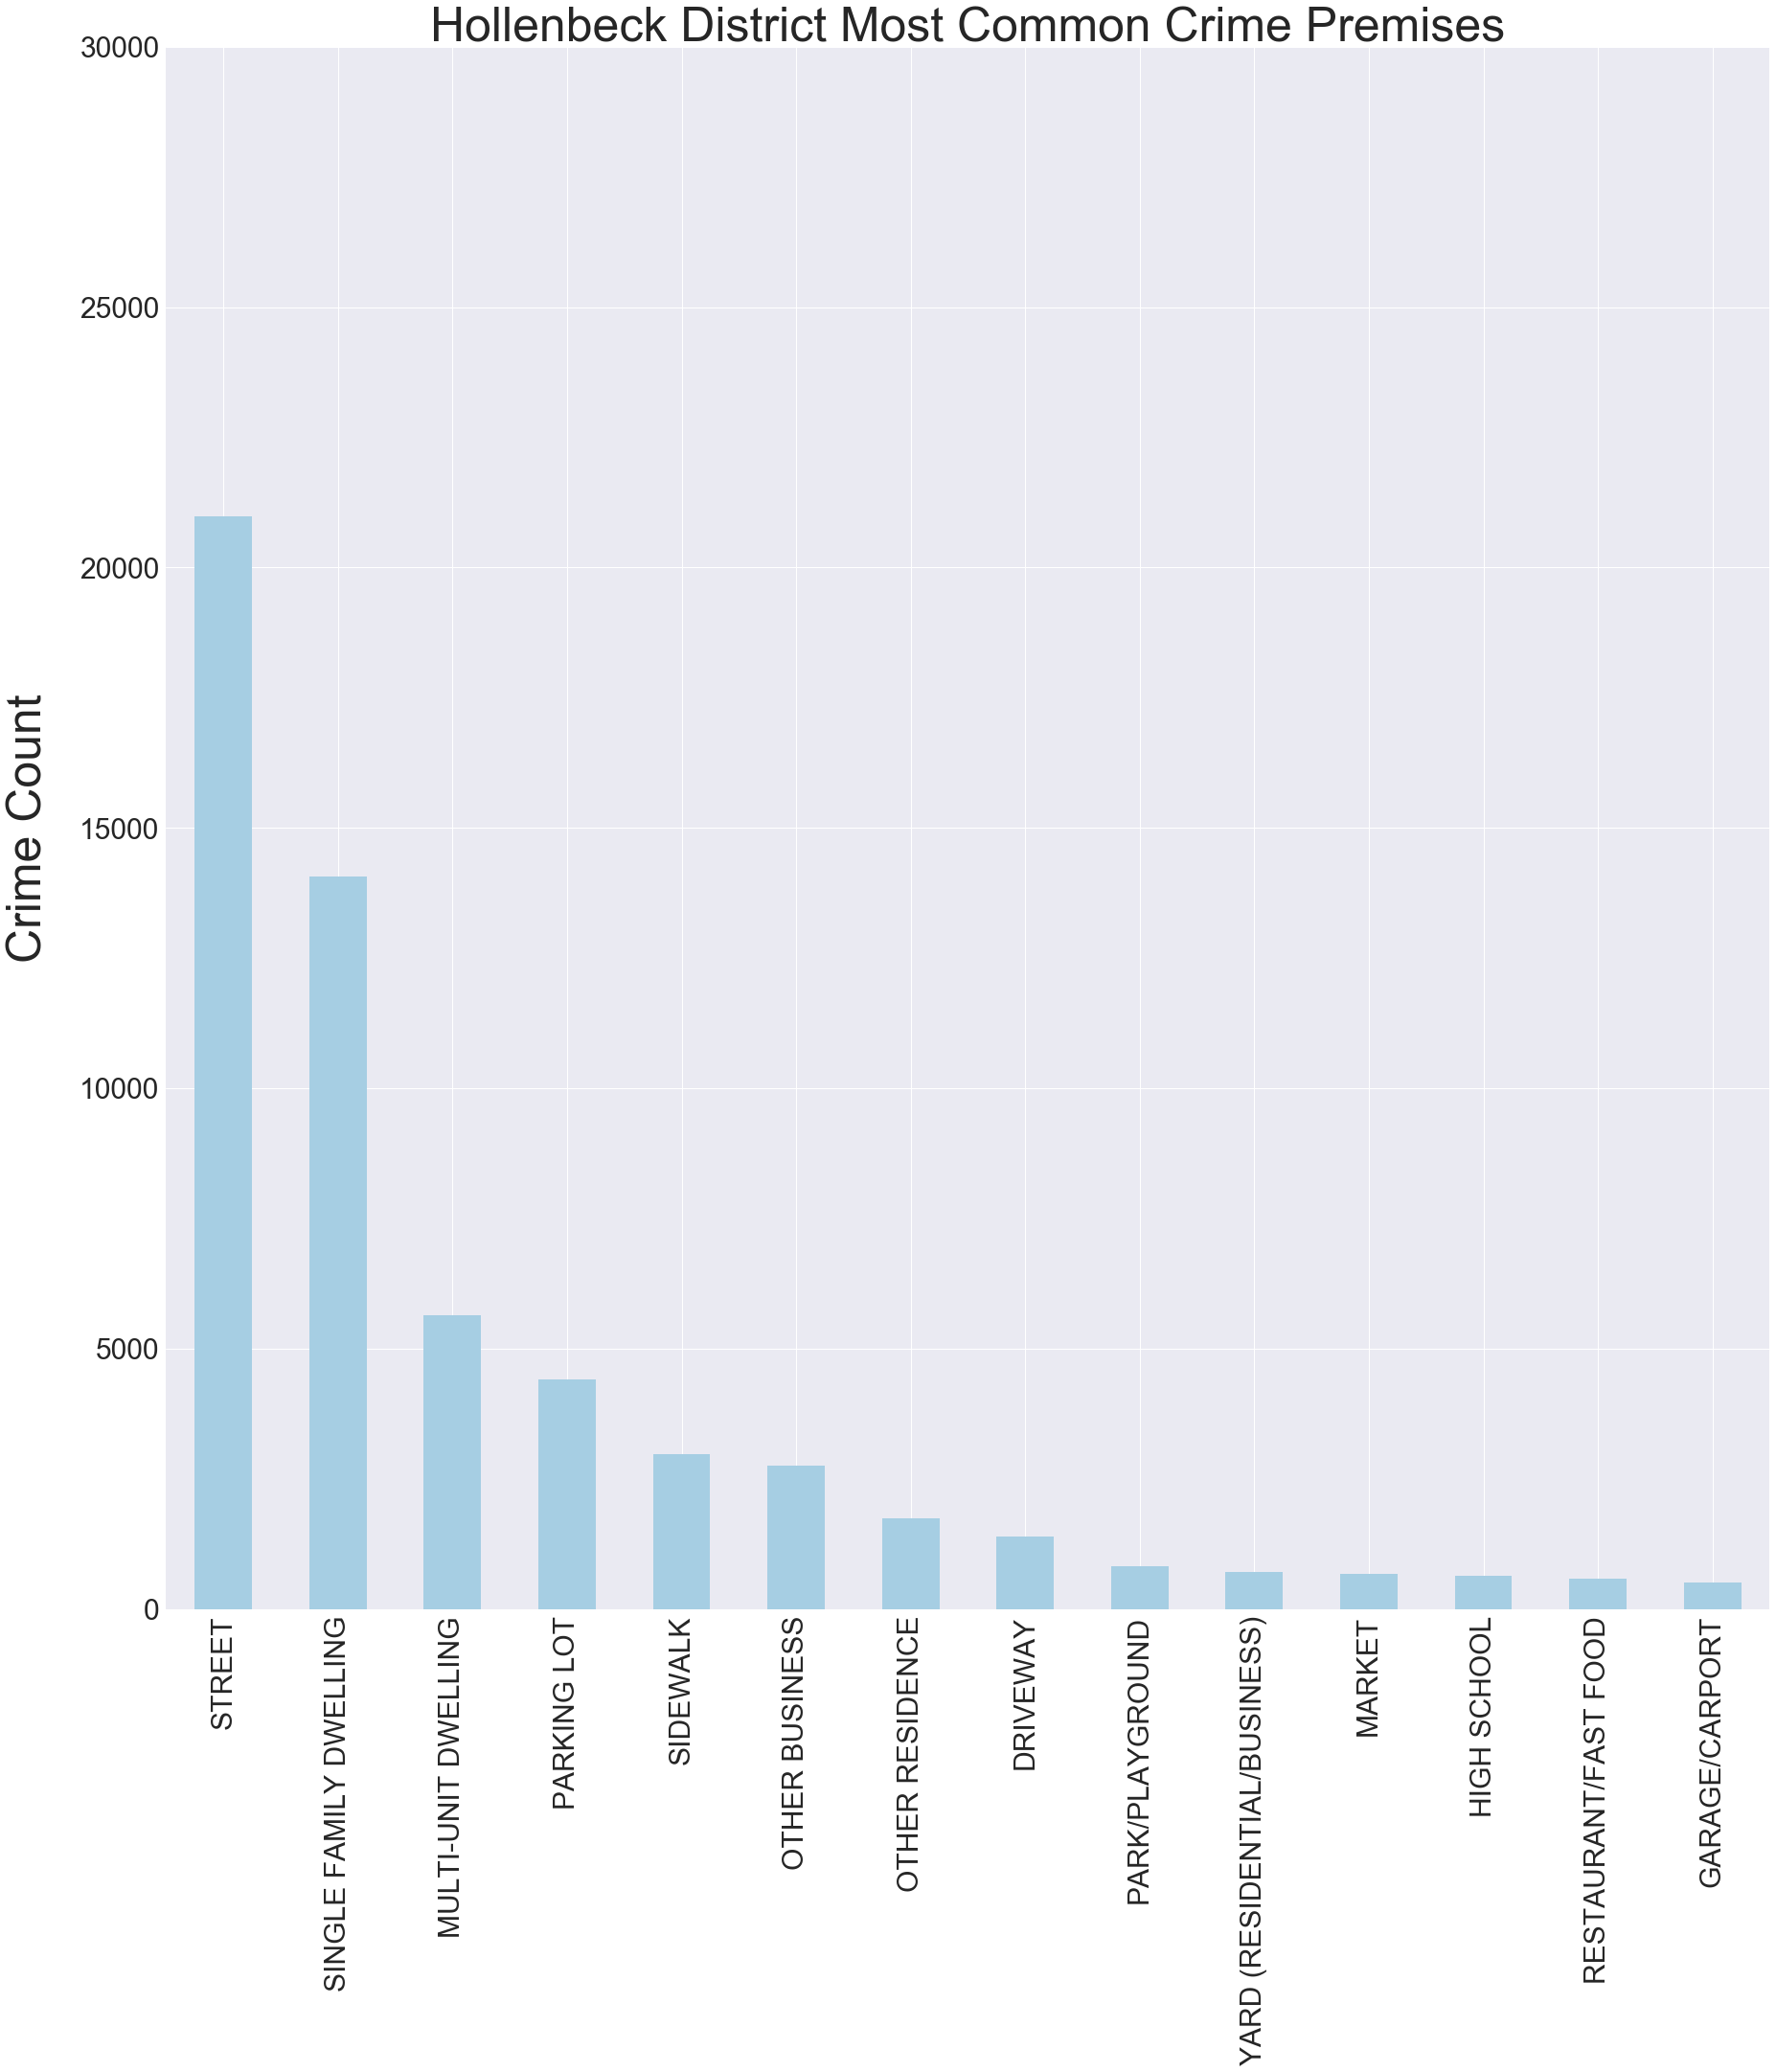

In [954]:
hollenbeck_premise=area_premise[area_premise['Area Name']=='Hollenbeck']
hollenbeck_premise=hollenbeck_premise.drop(columns='Area Name')
hollenbeck_premise=hollenbeck_premise['Premise Description'].value_counts().to_frame('Count')
hollenbeck_premise=hollenbeck_premise[hollenbeck_premise['Count']>500]
hollenbeck_premise['Count'].plot(kind='bar',figsize=(30,30),colormap='Paired')
plt.title('Hollenbeck District Most Common Crime Premises',fontsize=50)
plt.xticks(fontsize=30)
plt.ylabel('Crime Count',fontsize=50,labelpad=30)
plt.ylim(0,30000)
plt.yticks(fontsize=30)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

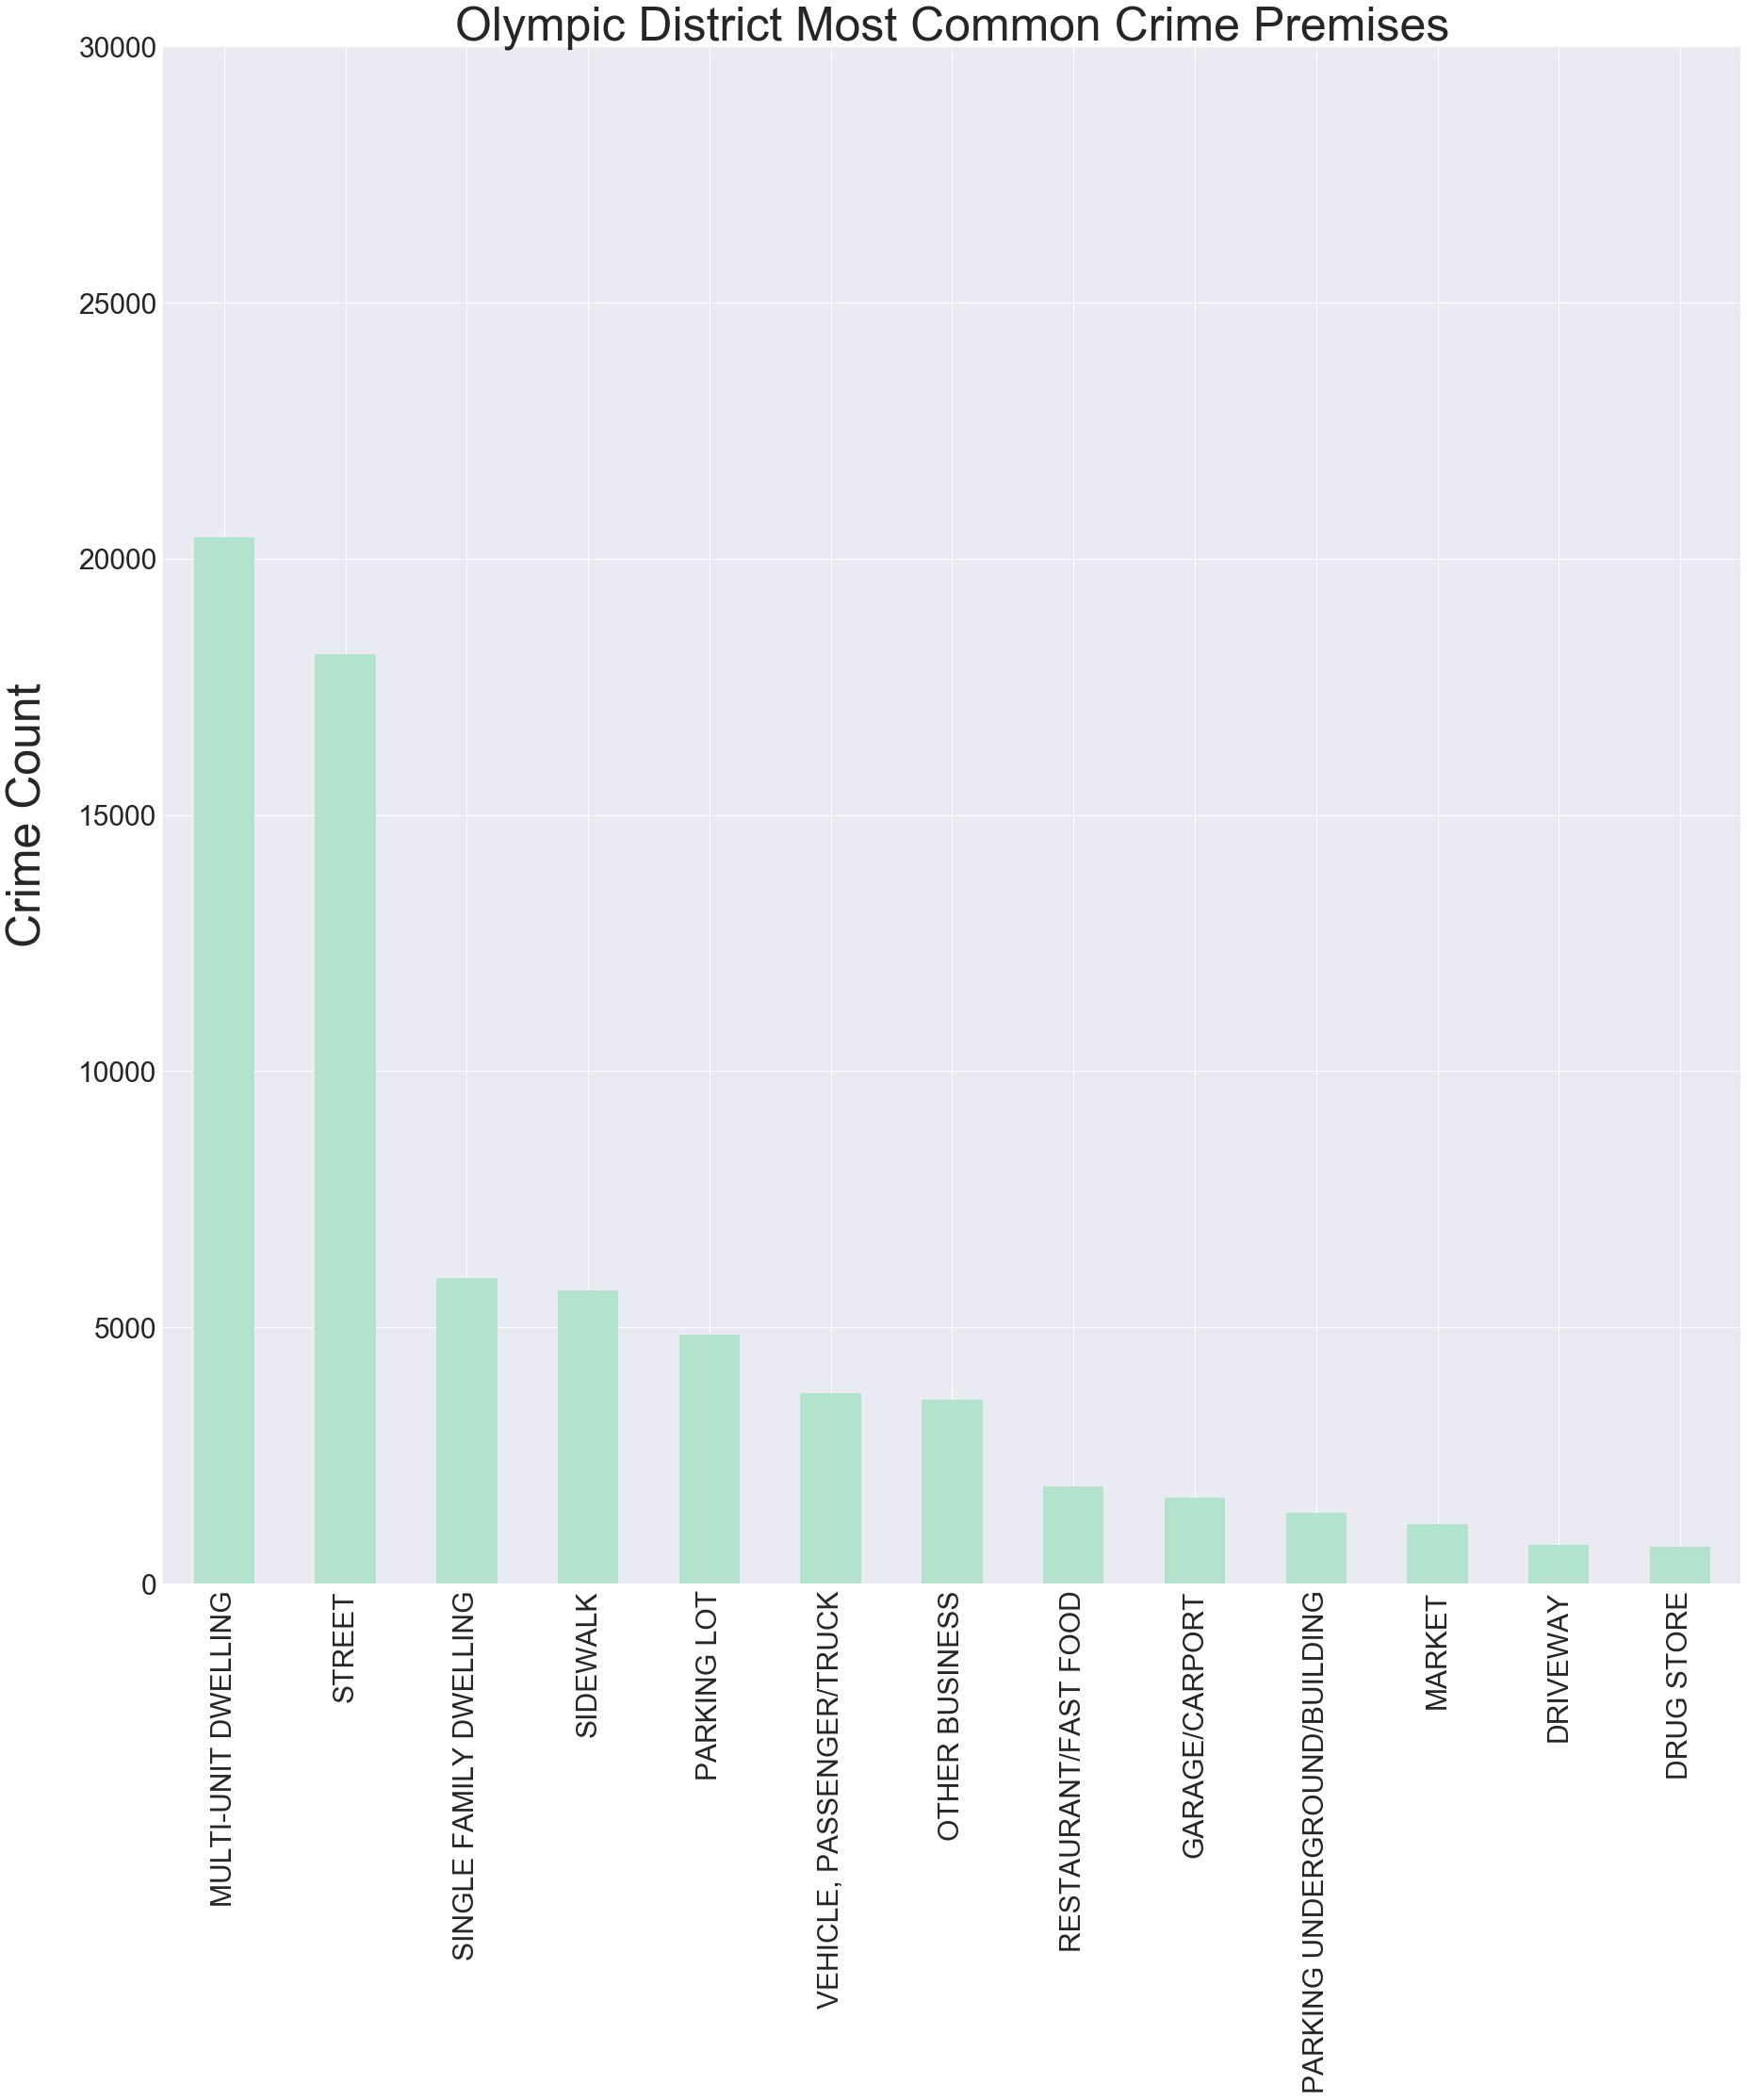

In [955]:
olympic_premise=area_premise[area_premise['Area Name']=='Olympic']
olympic_premise=olympic_premise.drop(columns='Area Name')
olympic_premise=olympic_premise['Premise Description'].value_counts().to_frame('Count')
olympic_premise=olympic_premise[olympic_premise['Count']>500]
olympic_premise['Count'].plot(kind='bar',figsize=(30,30),colormap='Pastel2')
plt.title('Olympic District Most Common Crime Premises',fontsize=50)
plt.xticks(fontsize=30)
plt.ylim(0,30000)
plt.ylabel('Crime Count',fontsize=50,labelpad=30)
plt.yticks()
plt.yticks(fontsize=30)

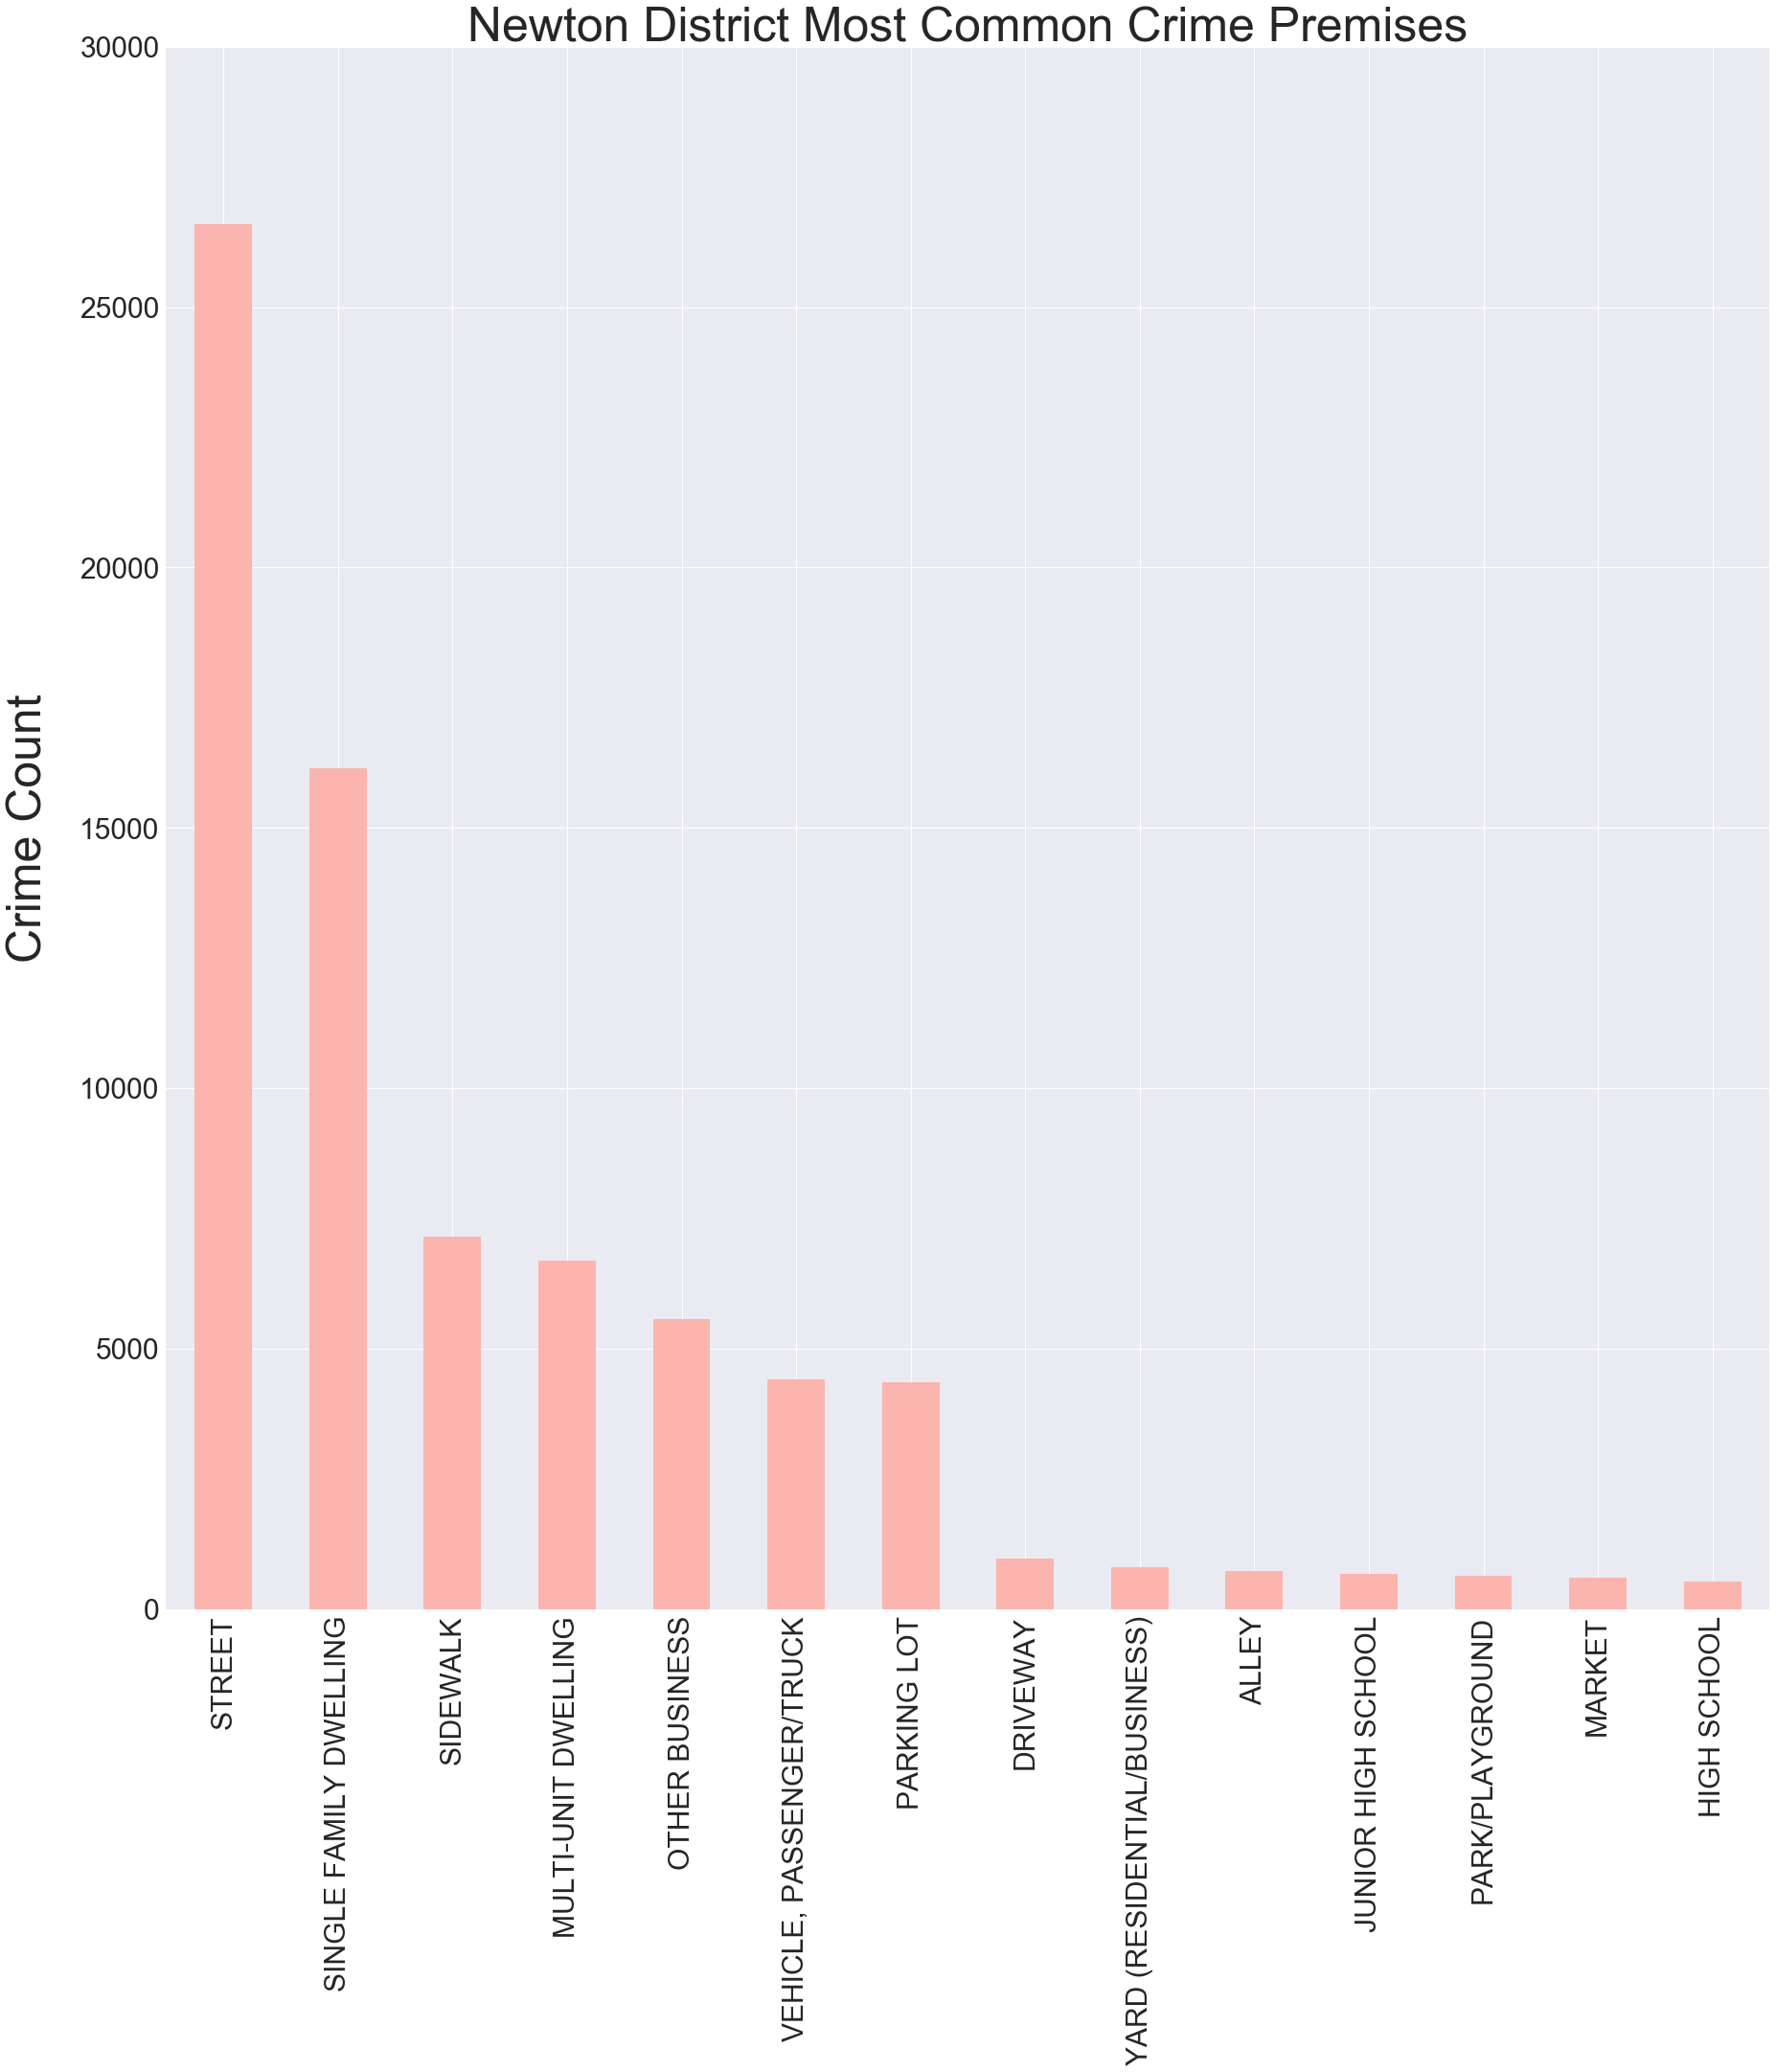

In [1006]:
newton_premise=area_premise[area_premise['Area Name']=='Newton']
newton_premise=newton_premise.drop(columns='Area Name')
newton_premise=newton_premise['Premise Description'].value_counts().to_frame('Count')
newton_premise=newton_premise[newton_premise['Count']>500]
newton_premise['Count'].plot(kind='bar',figsize=(30,30),colormap='Pastel1')
plt.title('Newton District Most Common Crime Premises',fontsize=50)
plt.xticks(fontsize=30)
plt.ylim(0,30000)
plt.ylabel('Crime Count',fontsize=50,labelpad=30)
plt.yticks(fontsize=30)
ax=plt.gca()
ax.yaxis.grid(True)

In [1008]:
theft_assault_info=df.loc[:,['Area Name','Crime','Premise Description']]
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc[['Central','Olympic','Newton','Hollenbeck']]
theft_assault_info=theft_assault_info.loc['Central']
theft_assault_info.reset_index(inplace=True)
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info.groupby(['Crime','Area Name','Premise Description']).size().to_frame('Count') 
theft_assault_info.reset_index(inplace=True)
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc['Central']
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info[theft_assault_info['Count']>0]
theft_assault_info.drop(columns='Area Name',inplace=True)
theft_assault_info.set_index(['Premise Description','Crime'],inplace=True)
theft_assault_info=theft_assault_info.unstack(level='Crime',fill_value=0)
premise=['STREET','SIDEWALK','MULTI-UNIT DWELLING','PARKING LOT','OTHER BUSINESS','DEPARTMENT STORE','OTHER STORE']
theft_assault_info=theft_assault_info['Count'].loc[premise].plot(kind='bar',stacked=True,colormap='tab20',figsize=(100,100)) 
plt.xticks(fontsize=120)
plt.yticks(fontsize=120)
plt.ylabel('Crime Count',fontsize=150)
plt.legend(loc='upper right',prop={'size':120})
plt.title('Crime in Central District by Premise',fontsize=150)
plt.xlabel('Premise',fontsize=150)
plt.tight_layout()

In [957]:
theft_assault_info=df.loc[:,['Area Name','Crime','Premise Description']]
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc[['Central','Olympic','Newton','Hollenbeck']]
theft_assault_info=df.loc[:,['Area Name','Crime','Premise Description']]
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc[['Central','Olympic','Newton','Hollenbeck']]
theft_assault_info=theft_assault_info.groupby(['Crime','Area Name','Premise Description']).size().to_frame('Count') 
theft_assault_info.reset_index(inplace=True)
theft_assault_info.set_index(['Premise Description','Crime'],inplace=True)
theft_assault_info=theft_assault_info.unstack(level='Crime')
g=sns.FacetGrid(theft_assault_info, col='Area Name')
g.map(plt.bar,'Premise Description','Count',stacked=True)
theft_assault_info


ValueError: Index contains duplicate entries, cannot reshape

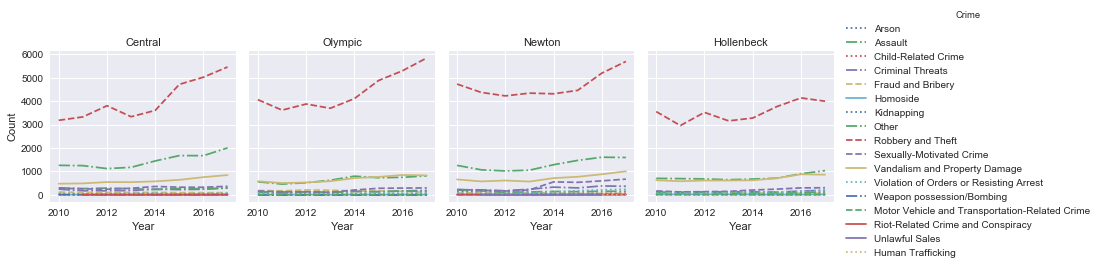

In [983]:
inv_cont=df.loc[:,['Date Occurred','Crime','Status Description','Area Name']]
inv_cont=inv_cont[inv_cont['Status Description']=='Invest Cont']
inv_cont=inv_cont.set_index('Area Name')
inv_cont=inv_cont.loc[['Central','Olympic','Newton','Hollenbeck']]
inv_cont['Year']=inv_cont['Date Occurred'].dt.year
inv_cont=inv_cont[inv_cont['Year']!=2018]
inv_cont.drop(columns=['Date Occurred','Status Description'],inplace=True)
inv_cont=inv_cont.groupby(['Year','Area Name','Crime']).size().to_frame('Count')
inv_cont.reset_index(inplace=True)
g=sns.FacetGrid(inv_cont,col='Area Name',hue='Crime',palette='deep',hue_kws={'ls':[':','-.',':','-.','--','-',':','-.','--','--','-',':','-.','--','-','-',':']},col_order=['Central','Olympic','Newton','Hollenbeck'])
g.map(plt.plot,'Year','Count')
g.add_legend()
g.set_titles("{col_name}")

0.8764341804843154


Text(0.5,1,'Crime Counts vs. Open Investigation Counts')

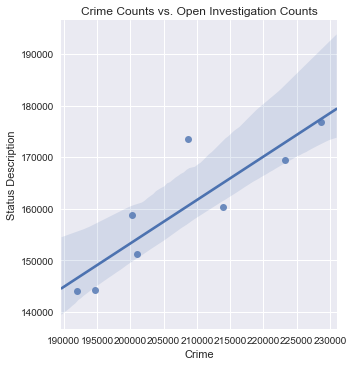

In [1021]:
corr_df=df.loc[:,['Date Occurred','Crime','Status Description']]
corr_df['Year']=corr_df['Date Occurred'].dt.year
corr_df=corr_df[corr_df['Year']!=2018]
corr_df.drop(columns='Date Occurred',inplace=True)
inv_count=corr_df.loc[:,['Year','Status Description']]
inv_count=inv_count[inv_count['Status Description']=='Invest Cont']
inv_count=inv_count.groupby('Year').count()
crime_count=corr_df.loc[:,['Year','Crime']]
crime_count=crime_count.groupby('Year').count()
merged_df=pd.merge(crime_count,inv_count, on='Year')
sns.lmplot(x='Crime',y='Status Description',data=merged_df)
print(merged_df['Status Description'].corr(merged_df['Crime']))
plt.title('Crime Counts vs. Open Investigation Counts')

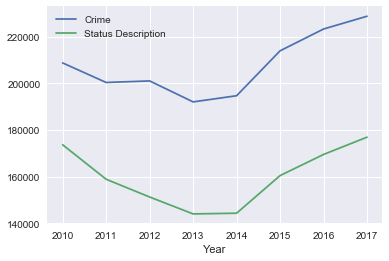

In [1020]:
merged_df.plot()